<h1> Task 1 </h1>

---

## Web scraping to gain company insights

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

# Importing Libraries and Data

In [1]:
#Importing Libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
#importing the data from WEB
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
#Converting raw data into pandas dataframe
data = pd.DataFrame()
data["reviews"] = reviews
data.head()

,reviews
0,✅ Trip Verified | Much better experience this ...
1,✅ Trip Verified | Once again a terrible busine...
2,✅ Trip Verified | BA A380's are showing their...
3,✅ Trip Verified | Credit to BA - Flew to Sin...
4,✅ Trip Verified | The check in area for prem...


In [5]:
#Converting dataset into csv
data.to_csv("BA_reviews_data.csv")

# Data Cleaning

In [6]:
#Reading the dataset created in above step
data = pd.read_csv("BA_reviews_data.csv")
data.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Much better experience this ...
1,1,✅ Trip Verified | Once again a terrible busine...
2,2,✅ Trip Verified | BA A380's are showing their...
3,3,✅ Trip Verified | Credit to BA - Flew to Sin...
4,4,✅ Trip Verified | The check in area for prem...


In [7]:
data.shape

(1000, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [9]:
#Droping Unnecessary Columns
data.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [10]:
#Checking the reviews
data['reviews'].loc[0]

'✅ Trip Verified | Much better experience this time around. Flew CPT to LHR on a new A350. Checkin was efficient. I used the Bidvest lounge at CPT as it is better than BA\'s lounge. Boarding was speedy. The new business class club suites are very good. Slightly irritating to be directed to the wrong seat (1A instead of 1K) which meant that after settling in the passenger in 1A showed up. We arranged a seat switch. Second time in a row it has happened. Why can\'t BA staff memorise which side of the plane is which and get it right? Captain\'s announcement was short and on point. Welcome drink was served at the correct temperature i.e. cold (first time ever for me - previously BA has always served the welcome champagne warm). IFE system was good - everything worked as it should. Felt slightly cheap that business class passengers have to pay for wifi. I did not bother. Cocktail was good. The nuts came on a cheap plastic tray which was naff ... other airlines bring out something classier. A

In [11]:
# Split the trip verified string
data.reviews = data.reviews.str.split('|', expand=True)[1]

In [12]:
data

,reviews
0,Much better experience this time around. Flew...
1,Once again a terrible business class experien...
2,"BA A380's are showing their age, hopefully t..."
3,Credit to BA - Flew to Singapore recently a...
4,The check in area for premium classes at Ga...
...,...
995,"A380 boarding is always a nightmare, but it w..."
996,\r\nThe 2-3-2 seating in the front section of...
997,London to Johannesburg. Smooth check in via ...
998,BA836 on 19 Jan. Excellent short flight from...


In [13]:
#cleaning the text by removing all special characters & numbers except alphabets
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text
data['clean_reviews'] = data['reviews'].apply(clean)
data.head()

,reviews,clean_reviews
0,Much better experience this time around. Flew...,Much better experience this time around Flew ...
1,Once again a terrible business class experien...,Once again a terrible business class experien...
2,"BA A380's are showing their age, hopefully t...",BA A s are showing their age hopefully they w...
3,Credit to BA - Flew to Singapore recently a...,Credit to BA Flew to Singapore recently and a...
4,The check in area for premium classes at Ga...,The check in area for premium classes at Gatw...


In [14]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [15]:
#POS Tagger Dictionary
pos_dict = {'A':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))

    new_list = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            new_list.append(tuple([word, pos_dict.get(tag[0])]))
    return new_list

In [16]:
data['POS Tagged'] = data['clean_reviews'].apply(token_stop_pos)
data.head()

,reviews,clean_reviews,POS Tagged
0,Much better experience this time around. Flew...,Much better experience this time around Flew ...,"[(Much, None), (better, None), (experience, n)..."
1,Once again a terrible business class experien...,Once again a terrible business class experien...,"[(terrible, None), (business, n), (class, n), ..."
2,"BA A380's are showing their age, hopefully t...",BA A s are showing their age hopefully they w...,"[(BA, None), (showing, v), (age, n), (hopefull..."
3,Credit to BA - Flew to Singapore recently a...,Credit to BA Flew to Singapore recently and a...,"[(Credit, n), (BA, n), (Flew, n), (Singapore, ..."
4,The check in area for premium classes at Ga...,The check in area for premium classes at Gatw...,"[(check, n), (area, n), (premium, None), (clas..."


In [17]:
#Obtaining the stem words – Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rev = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rev = lemma_rev + " " + lemma
     else:
        lemma = lemmatizer.lemmatize(word, pos=pos)
        lemma_rev = lemma_rev + " " + lemma
    return lemma_rev

In [18]:
data['lemma_rev'] = data['POS Tagged'].apply(lemmatize)
data.head()

,reviews,clean_reviews,POS Tagged,lemma_rev
0,Much better experience this time around. Flew...,Much better experience this time around Flew ...,"[(Much, None), (better, None), (experience, n)...",Much better experience time around Flew CPT ...
1,Once again a terrible business class experien...,Once again a terrible business class experien...,"[(terrible, None), (business, n), (class, n), ...",terrible business class experience BA flight...
2,"BA A380's are showing their age, hopefully t...",BA A s are showing their age hopefully they w...,"[(BA, None), (showing, v), (age, n), (hopefull...",BA show age hopefully update interior soon l...
3,Credit to BA - Flew to Singapore recently a...,Credit to BA Flew to Singapore recently and a...,"[(Credit, n), (BA, n), (Flew, n), (Singapore, ...",Credit BA Flew Singapore recently also back ...
4,The check in area for premium classes at Ga...,The check in area for premium classes at Gatw...,"[(check, n), (area, n), (premium, None), (clas...",check area premium class Gatwick nice queue ...


In [19]:
data['lemma_rev'][0]

'  Much better experience time around Flew CPT LHR new Checkin efficient use Bidvest lounge CPT well BA lounge Boarding speedy new business class club suite good Slightly irritate direct wrong seat instead K mean settle passenger show arrange seat switch Second time row happen BA staff memorise side plane get right Captain announcement short point Welcome drink serve correct temperature e cold first time ever previously BA always serve welcome champagne warm IFE system good everything work Felt slightly cheap business class passenger pay wifi bother Cocktail good nut come cheap plastic tray naff airline bring something classier female flight attendant come take order ask Rooibas panacotta chicken breast repeat back want P C bizarre thing say misheard think say want beef sea Confusion reign explain checklist passenger order abbreviate first letter say P panacotta C chicken bizarre repeat back order passenger code say confirm panacotta start chicken main dish like every restaurant airlin

In [20]:
data['clean_reviews'][0]

' Much better experience this time around Flew CPT to LHR on a new A Checkin was efficient I used the Bidvest lounge at CPT as it is better than BA s lounge Boarding was speedy The new business class club suites are very good Slightly irritating to be directed to the wrong seat A instead of K which meant that after settling in the passenger in A showed up We arranged a seat switch Second time in a row it has happened Why can t BA staff memorise which side of the plane is which and get it right Captain s announcement was short and on point Welcome drink was served at the correct temperature i e cold first time ever for me previously BA has always served the welcome champagne warm IFE system was good everything worked as it should Felt slightly cheap that business class passengers have to pay for wifi I did not bother Cocktail was good The nuts came on a cheap plastic tray which was naff other airlines bring out something classier A female flight attendant came to take my order and I ask

# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
Analyzer = SentimentIntensityAnalyzer()

In [24]:
#calculating vader sentiment
def sentiment_scores(review):
    ss = Analyzer.polarity_scores(review)
    return ss['compound']

data['Sentiment'] = data['lemma_rev'].apply(sentiment_scores)

# Function to analyse the sentiment
def sentiment_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [25]:
data['Review'] = data['Sentiment'].apply(sentiment_analysis)
data.head(10)

,reviews,clean_reviews,POS Tagged,lemma_rev,Sentiment,Review
0,Much better experience this time around. Flew...,Much better experience this time around Flew ...,"[(Much, None), (better, None), (experience, n)...",Much better experience time around Flew CPT ...,0.9931,Positive
1,Once again a terrible business class experien...,Once again a terrible business class experien...,"[(terrible, None), (business, n), (class, n), ...",terrible business class experience BA flight...,-0.9287,Negative
2,"BA A380's are showing their age, hopefully t...",BA A s are showing their age hopefully they w...,"[(BA, None), (showing, v), (age, n), (hopefull...",BA show age hopefully update interior soon l...,0.9100,Positive
3,Credit to BA - Flew to Singapore recently a...,Credit to BA Flew to Singapore recently and a...,"[(Credit, n), (BA, n), (Flew, n), (Singapore, ...",Credit BA Flew Singapore recently also back ...,0.9702,Positive
4,The check in area for premium classes at Ga...,The check in area for premium classes at Gatw...,"[(check, n), (area, n), (premium, None), (clas...",check area premium class Gatwick nice queue ...,0.9940,Positive
5,The flight took off a little late due to Hea...,The flight took off a little late due to Heat...,"[(flight, n), (took, v), (little, None), (late...",flight take little late due Heathrow congest...,0.8934,Positive
6,BA is great in the air! But... they sell you ...,BA is great in the air But they sell you conn...,"[(BA, n), (great, None), (air, n), (sell, v), ...",BA great air sell connection thru London Hea...,0.5719,Positive
7,I had broken my leg 2 days before our return...,I had broken my leg days before our return fl...,"[(broken, v), (leg, None), (days, n), (return,...",break leg day return flight Lisbon London ca...,0.7430,Positive
8,Check in at MIA straightforward. BA use Ameri...,Check in at MIA straightforward BA use Americ...,"[(Check, n), (MIA, n), (straightforward, n), (...",Check MIA straightforward BA use American fl...,0.2885,Neutral
9,Never I saw such a terrible customer experi...,Never I saw such a terrible customer experien...,"[(Never, r), (saw, v), (terrible, None), (cust...",Never saw terrible customer experience plane...,0.0575,Neutral


In [26]:
#Checking value_count on Review column
review_count = data['Review'].value_counts()
review_count

Positive    480
Negative    411
Neutral     109
Name: Review, dtype: int64

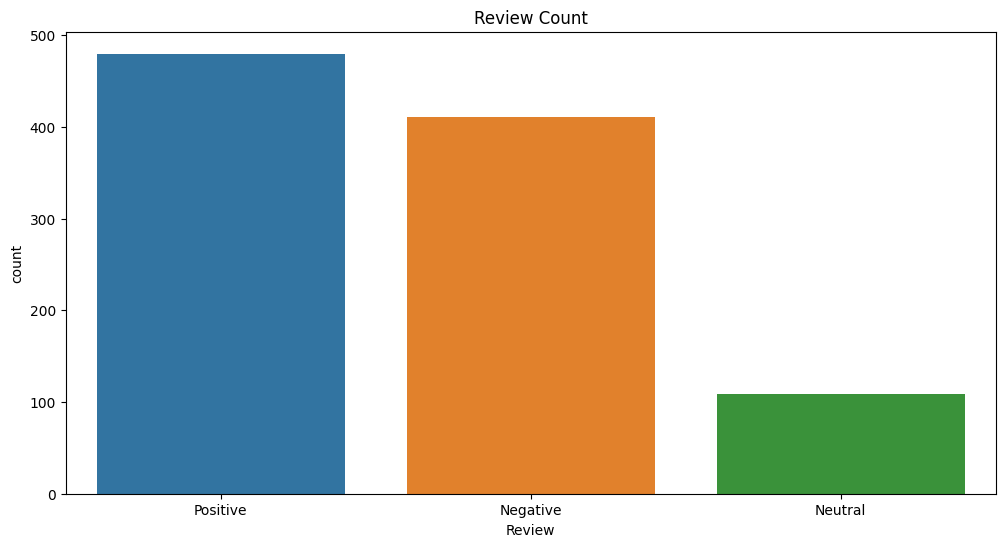

In [28]:
#Countplot
plt.figure(figsize=(12,6))
plt.title('Review Count');
sns.countplot(x=data['Review'], data=data);

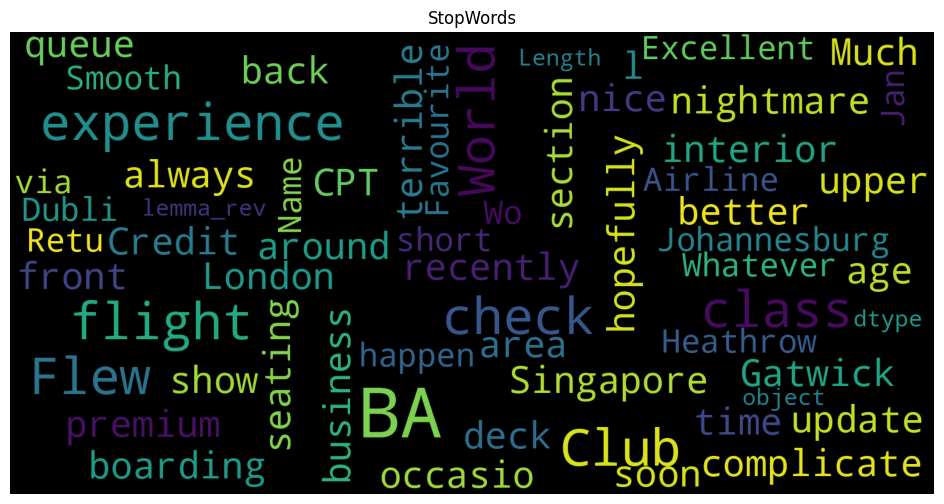

In [30]:
stopwords = set(STOPWORDS)

# Function to generate stopwords
def show_wordcloud(data):
    wordcloud = WordCloud(max_words=150,
                          max_font_size=30,
                          stopwords=stopwords,
                          scale=4,
                          random_state=1)
    wordcloud = wordcloud.generate(str(data))

    plt.figure(figsize=(12,6))
    plt.axis('off')
    plt.title('StopWords')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(data.lemma_rev)